In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
A=df.as_matrix()

In [3]:
X_train=A[:,0:-2]
t_train=A[:,-1]
N_tr=np.shape(X_train)[0]
D=np.shape(X_train)[1]

### Normalize features

In [4]:
moy = np.zeros(D)
sigma = np.zeros(D)
for k in range(0,D): # D columns of entries
    moy[k] = np.mean(X_train[:,k])
    sigma[k] = np.std(X_train[:,k])
    X_train[:,k] = (X_train[:,k]-moy[k])/sigma[k] # normalized: centered, variance 1

t_mean= np.mean(t_train)
t_sig = np.std(t_train)
t_train_mf = (t_train-t_mean)/t_sig # mean-free target vector of training set

In [5]:
# 1. Autocovariance
X_train_trans = np.transpose(X_train)
autocov = 1.0/N_tr*np.dot(X_train_trans,X_train)

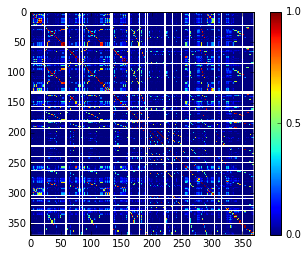

In [6]:
fig=plt.figure()
cax=plt.imshow(autocov, interpolation='none',clim=[0,1],cmap='jet')
fig.colorbar(cax, ticks=[0, 0.5, 1])

In [7]:
B=np.isnan(autocov)
np.sum(B)/(D**2)

0

In [8]:
autocov[50:60,0:10]

array([[-0.00761098,  0.00775795,  0.24193856,  0.04499668,  0.00614796,
         0.00509391,  0.02206098,  0.01794801, -0.00146648,  0.00461172],
       [-0.0045496 ,  0.00644454,  0.08045169,  0.01181708,  0.25061898,
         0.23175432,  0.04894372,  0.03687229,  0.02434353,  0.03635043],
       [-0.00362226,  0.0062167 ,  0.09169981,  0.01105713,  0.24339785,
         0.21958581,  0.04669685,  0.03397247,  0.02251631,  0.03291143],
       [-0.00382222,  0.00658529,  0.09426987,  0.0112177 ,  0.24628129,
         0.22739868,  0.04853776,  0.0363498 ,  0.02375926,  0.03550984],
       [-0.00362226,  0.0062167 ,  0.09169981,  0.01105713,  0.24339785,
         0.21958581,  0.04669685,  0.03397247,  0.02251631,  0.03291143],
       [-0.00456205,  0.00608564,  0.07893629,  0.01162555,  0.24740725,
         0.22367549,  0.04699024,  0.0343908 ,  0.02306454,  0.03368523],
       [-0.00456205,  0.00608564,  0.07893629,  0.01162555,  0.24740725,
         0.22367549,  0.04699024,  0.0343908 